# Fandango Movie Ratings Analysis

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest ([Fandango](https://www.fandango.com/) is an online movie ratings aggregator). He published his analysis in [this article](https://fivethirtyeight.com/features/fandango-movies-ratings/).

This project analyzes recent Fandango movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

The goal of this analysis is **to determine whether there has been any change in Fandango's rating system after Hickey's analysis**.


## Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
ratings_before = pd.read_csv('Data/fandango_score_comparison.csv')
ratings_after = pd.read_csv('Data/movie_ratings_16_17.csv')

## Exploring the Data

In [3]:
ratings_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [4]:
ratings_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


Below we isolate the only the columns that provide information about Fandango so we make the relevant data more readily available for later use. 

We'll make copies to avoid any `SettingWithCopyWarning` later on.

In [5]:
fandango_previous = ratings_before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = ratings_after[['movie', 'year', 'fandango']].copy()

fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [6]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


### Assessing The Population of Interest for This Analysis

The goal of this analysis is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for this analysis is made of **all the movie ratings stored on Fandango's website, regardless of the releasing year**.

Because the goal is to find out whether the parameters of this population changed after Hickey's analysis, the interest here is sample the population at two different periods in time — previous and after Hickey's analysis — so the two states can be compared.

The data obtained was sampled at the moments of interest: one sample was taken previous to the analysis, and the other after the analysis. Next is to make sure that the samples are representative, otherwise a large sampling error is expected and, ultimately, wrong conclusions.

**Hickey's Dataset**

From [Hickey's article](https://fivethirtyeight.com/features/fandango-movies-ratings/) and from the [README.md](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) of the data set's repository, the following sampling criteria was used:

- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
- The movie must have had tickets on sale in 2015.

The **sampling was clearly not random** because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population of interest in this analysis. It seems more likely that it isn't, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

**Dataquest's Dataset**

From their [README.ME](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md), Dataquest's sample conditions were as follows:

- The movie must have been released in 2016 or later.
- The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).

This **second sample is also not random** because it is likely subject to temporal trends and it's unlikely to be representative of the population of interest for this analysis.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called [purposive sampling](https://www.youtube.com/watch?v=CdK7N_kTzHI&feature=youtu.be) (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for my analysis.

### Changing the Goal of This Analysis to Make The Samples Representative

The updated goal of this analysis is **to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016**.

With this new goal the two populations of interests are now:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

For a more precise definition of the term **"popular"**, Hickey's definition will be used for this analysis: A movie as "popular" only if it has **30 fan ratings or more on Fandango's website**.

### Isolate New Samples of Interest

Add year to Hickey's dataset.

In [7]:
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1].copy()

In [8]:
fandango_previous.Year.unique()

array(['2015', '2014'], dtype=object)

In [9]:
fandango_2015 = fandango_previous[fandango_previous.Year == '2015'].copy()

In [10]:
fandango_2016 = fandango_after[fandango_after.year == 2016].copy()

Although one of the sampling criteria for the 2016 data is movie popularity, the sample doesn't provide information about the number of fan ratings. This raises a quesiton about whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [11]:
fandango_2016.sample(n=10, random_state=1)

,movie,year,fandango
36,Collide,2016,3.5
75,Ice Age: Collision Course,2016,4.0
125,Now You See Me 2,2016,4.0
171,The Disappointments Room,2016,2.5
92,Kubo and the Two Strings,2016,4.5
134,Pride and Prejudice and Zombies,2016,4.0
40,Deadpool,2016,4.5
115,Money Monster,2016,4.0
204,War Dogs,2016,4.0
111,Miracles from Heaven,2016,4.5


As of August 2020, Fandango has replaced the 5-Star Fan Ratings with the Rotten Tomatoes Audience Score. This means that the number of fan ratings is no longer available on the website.

This means that goal will need to be changed or modified to specify the time frame of this analysis. The updated goal is as follows:

The updated goal of this analysis is **to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016 as of April 2018**.

April 2018 is the cut-off date of choice because there is evidence from Dataquest that shows that as of this data, the number of fan ratings for a movie was available on the Fandango website.

As of April 2018, these are the fan ratings that Dataquest found for their sampled movies:

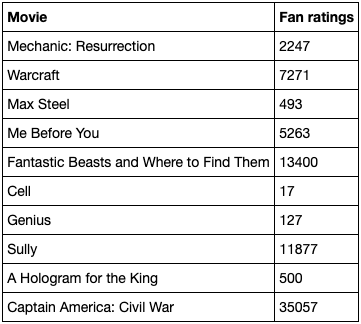

90% of the movies in the 2016 sample are popular. This is enough to move forward with a bit more confidence.

Double-checking the 2015 data set for popular movies.

In [12]:
sum(fandango_2015.Fandango_votes) < 30

False

## Comparing Distribution Shapes for 2015 and 2016

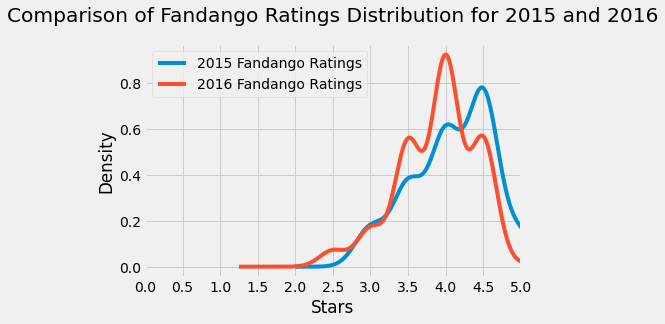

In [13]:
%matplotlib inline
plt.style.use('fivethirtyeight')
# sns.set_style("dark", {'axes.grid' : False})


fandango_2015['Fandango_Stars'].plot.kde(label='2015 Fandango Ratings')
fandango_2016['fandango'].plot.kde(label='2016 Fandango Ratings')

plt.xlim(0,5)
plt.xticks(np.arange(0,5.1,.5))
plt.xlabel('Stars')
plt.ylabel('Density')
plt.title('Comparison of Fandango Ratings Distribution for 2015 and 2016', y = 1.07)
plt.legend(loc='best')
plt.show()

The kde plots above show that there's a clear difference between the two distributions:

- Both years are strongly left skewed
- 2016's distribution is slightly shifted to the left relative to the 2015 distribution

The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. This is clearly evident from the kde's above but irrelevant for this analysis.

The slight left shift of the 2016 distribution shows that ratings were slightly lower in 2016 compared to 2015. This suggests a difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. More specifically, the ratings in 2016 were slightly lower compared to 2015.

The kde plots show that **there is a clear difference and a clear direction of difference between the two samples**.

## Examining The Frequency Distribution Tables for 2015 and 2016

Relative frequencies will be used for the distribution table because the samples have different number of movies. Percentages will be used for this analysis for better readability.

In [14]:
print('2015 Ratings Frequency Distribution Table'+ '\n' + '-' * 42)
print(fandango_2015.Fandango_Stars.value_counts(normalize=True).sort_index() * 100)

print('\n2016 Ratings Frequency Distribution Table'+ '\n' + '-' * 42)
print(fandango_2016.fandango.value_counts(normalize=True).sort_index() * 100) 

2015 Ratings Frequency Distribution Table
------------------------------------------
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

2016 Ratings Frequency Distribution Table
------------------------------------------
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


Observing the two frequency tables shows that **there clearly is a difference between the two frequency distributions**:

- Very high ratings (4.5 and 5 stars) had significantly lower percentages in 2016 relative to 2015. 
- In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. 
- Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.
- The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. 

There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. Although this follows the findings from the kde plot comparison, it challenges the direction of the overall change between the two years because 3.5 and 4.0 are high ratings. This shows that **the direction of difference is not as clear as it was on the kde plots**.

## Comparing Summary Statistics for 2015 and 2016

For a more precise picture of the direction of the difference, the following sample statistics will be compared: mean, median and mode.

In [15]:
# 2015 Sample Statistics
mean_2015 = fandango_2015.Fandango_Stars.mean()
median_2015 = fandango_2015.Fandango_Stars.median()
mode_2015 = fandango_2015.Fandango_Stars.mode()[0]

# 2016 Sample Statistics
mean_2016 = fandango_2016.fandango.mean()
median_2016 = fandango_2016.fandango.median()
mode_2016 = fandango_2016.fandango.mode()[0]

# Summary Statistics Table
summary_stats = pd.DataFrame(columns=['2015', '2016'])
summary_stats['2015'] = [mean_2015, median_2015, mode_2015]
summary_stats['2016'] = [mean_2016, median_2016, mode_2016]

In [16]:
summary_stats

,2015,2016
0,4.085271,3.887435
1,4.000000,4.000000
2,4.500000,4.000000


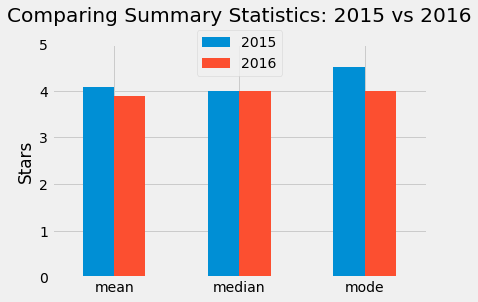

In [17]:
summary_stats.plot.bar()

plt.ylim(0,5)
plt.xticks(np.arange(3), ('mean', 'median', 'mode'), rotation=0)
plt.ylabel('Stars')
plt.title('Comparing Summary Statistics: 2015 vs 2016', y=1.07)
plt.legend(loc=9, bbox_to_anchor=(0.5, 1.09, 0., 0.))
plt.savefig('fandango.png', bbox_inches='tight')
plt.show()



In [18]:
mean_change = (summary_stats.loc[0][0] - summary_stats.loc[0][1]) / summary_stats.loc[0][0]
median_change = (summary_stats.loc[1][0] - summary_stats.loc[1][1]) / summary_stats.loc[1][0]
mode_change = (summary_stats.loc[2][0] - summary_stats.loc[2][1]) / summary_stats.loc[2][0]

print('Change in Summary Statistics: 2015 vs 2016' + '\n' + '--' * 21)
print('Change in mean:   ', "{:.2%}".format(mean_change))
print('Change in median: ', "{:.2%}".format(median_change))
print('Change in mode:   ', "{:.2%}".format(mode_change))


Change in Summary Statistics: 2015 vs 2016
------------------------------------------
Change in mean:    4.84%
Change in median:  0.00%
Change in mode:    11.11%


While the median is the same for both distributions, the mean and mode are higher in 2015 (approximately. 5% and 11% respectively relative to 2016. 


## Conclusion

This analysis shows that there is a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. On average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015. 

The direct cause of this change in popular movie ratings from 2015 to 2016 is beyond the scope if this analysis. However, it is likely that the change was caused by Fandango fixing its biased rating system after Hickey's analysis.

## Future Analysis

These are a few next steps to consider based on the results of this analysis:

- Recommend the best website to check for a movie rating by comparing ratings of different movie ratings aggregators.
- Investigate the cause of the change in Fandango popular movie ratings.